In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
sns.set_style("whitegrid")

In [2]:
#Data Exploration (EDA)
df = pd.read_csv('Titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#The 'Cabin' column is mostly empty, so we'll just drop it completely.
df.drop('Cabin', axis=1, inplace=True)

In [8]:
#'Age' has a lot of missing values. Let's fill them with the middle value (median) of the Age column.
df['Age'].fillna(df['Age'].median(),inplace=True)

C:\Users\Srees_lappy\AppData\Local\Temp\ipykernel_5156\3468991334.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)


In [9]:
#'Embarked' is missing just a couple of values. We'll fill them with the most frequent port.
mode_embarked=df['Embarked'].mode()[0]
df['Embarked'].fillna(mode_embarked,inplace=True)

C:\Users\Srees_lappy\AppData\Local\Temp\ipykernel_5156\1373398960.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(mode_embarked,inplace=True)


In [10]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

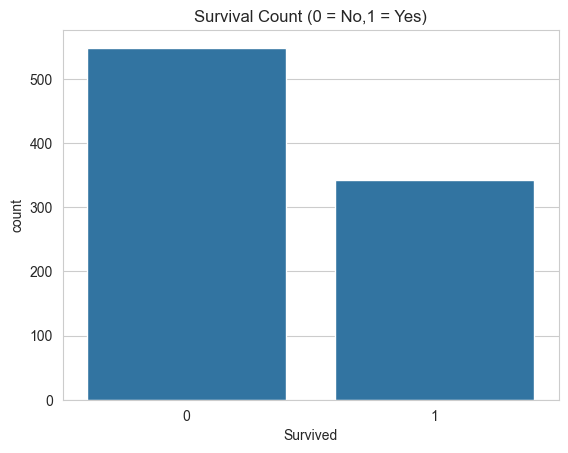

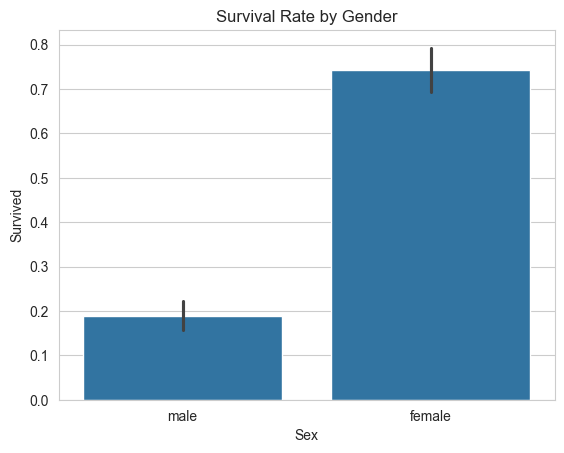

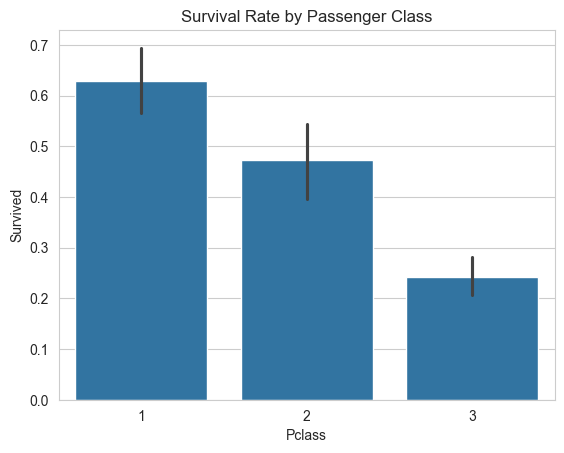

In [11]:
#Visualisation:
#Let's see how many people survived and didn't.
sns.countplot(x='Survived',data=df)
plt.title('Survival Count (0 = No,1 = Yes)')
plt.show()

# How does gender affect survival?
sns.barplot(x='Sex',y='Survived',data=df)
plt.title('Survival Rate by Gender')
plt.show()

# How does passenger class affect survival?
sns.barplot(x='Pclass',y='Survived',data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [13]:
#We can also drop columns that aren't useful for our model, like names and ticket numbers.
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [14]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [15]:
#We'll change 'Sex' (male/female) into 0 and 1.
df['Sex']=df['Sex'].map({'male': 0,'female': 1})

In [16]:
#For 'Embarked' (ports), we'll create new columns for each port(one-hot encoding).
#For example, if a passenger embarked at 'S', the new 'Embarked_S' column will be 1, and others will be 0.
df=pd.get_dummies(df,columns=['Embarked'],drop_first=True).astype(int)

In [17]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22,1,0,7,0,1
1,1,1,1,38,1,0,71,0,0
2,1,3,1,26,0,0,7,0,1
3,1,1,1,35,1,0,53,0,1
4,0,3,0,35,0,0,8,0,1


In [18]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,0.543351,-0.064909,-0.035322,0.081629,0.257482,0.003650,-0.149683
Pclass,-0.338481,1.000000,-0.131900,-0.339999,0.083081,0.018443,-0.550553,0.221009,0.074053
Sex,0.543351,-0.131900,1.000000,-0.080750,0.114631,0.245489,0.182331,0.074115,-0.119224
Age,-0.064909,-0.339999,-0.080750,1.000000,-0.233066,-0.172745,0.097064,-0.031479,-0.006237
SibSp,-0.035322,0.083081,0.114631,-0.233066,1.000000,0.414838,0.159506,-0.026354,0.068734
Parch,0.081629,0.018443,0.245489,-0.172745,0.414838,1.000000,0.216252,-0.081228,0.060814
Fare,0.257482,-0.550553,0.182331,0.097064,0.159506,0.216252,1.000000,-0.118319,-0.161341
Embarked_Q,0.003650,0.221009,0.074115,-0.031479,-0.026354,-0.081228,-0.118319,1.000000,-0.499421
Embarked_S,-0.149683,0.074053,-0.119224,-0.006237,0.068734,0.060814,-0.161341,-0.499421,1.000000


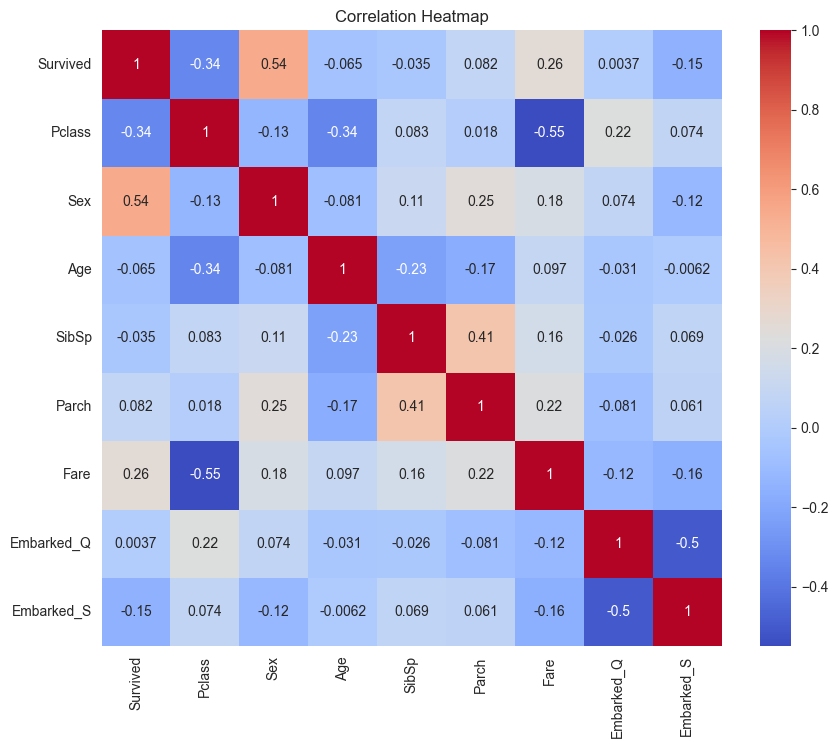

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [20]:
#Model Building:
features=df.drop('Survived',axis=1) # These are our X values
target=df['Survived'] # This is our y value

In [21]:
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=42)

#We'll use Logistic Regression, which is a good choice for a simple prediction task like this.
log_reg_model=LogisticRegression(solver='liblinear',random_state=42)
log_reg_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [22]:
#Make predictions on the test data
predictions=log_reg_model.predict(X_test)
probabilities=log_reg_model.predict_proba(X_test)[:, 1]

In [23]:
#Performance metrics
print(f"Accuracy: {accuracy_score(y_test, predictions):.4f}")
print(f"Precision: {precision_score(y_test, predictions):.4f}")
print(f"Recall: {recall_score(y_test, predictions):.4f}")
print(f"F1-Score: {f1_score(y_test, predictions):.4f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, probabilities):.4f}")

Accuracy: 0.7877
Precision: 0.7571
Recall: 0.7162
F1-Score: 0.7361
ROC-AUC Score: 0.8790


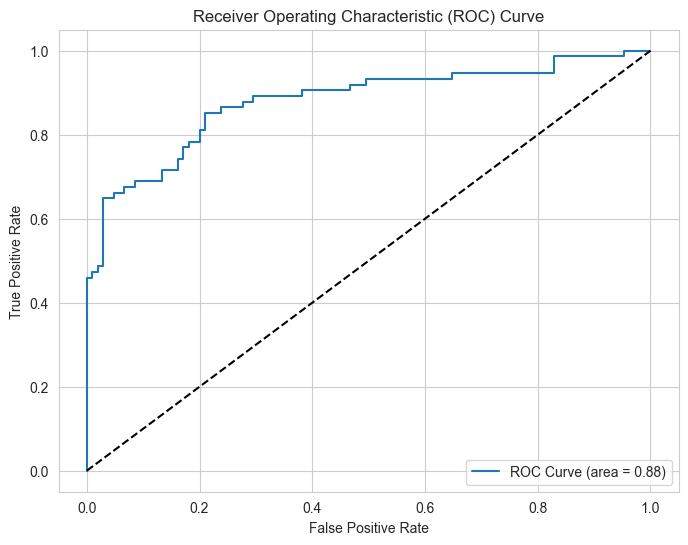

In [24]:
#Visualize the ROC curve
#This plot shows how well our model can tell the difference between survivors and non-survivors.
#A curve closer to the top-left corner is better.
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc_score(y_test, probabilities):.2f})')
plt.plot([0, 1], [0, 1], 'k--') # This is the dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [25]:
#Model's coefficients
#The coefficients tell us which features were most important for the model's prediction.
#A positive coefficient means that feature increases the chance of survival, a negative coefficient means it decreases the chance.
coefficients = pd.DataFrame({
    'Feature': features.columns,
    'Coefficient': log_reg_model.coef_[0]
})
coefficients['exp(Coefficient)'] = np.exp(coefficients['Coefficient'])
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)
print("Here's how important each feature was for the model:")
print(coefficients)

Here's how important each feature was for the model:
      Feature  Coefficient  exp(Coefficient)
1         Sex     2.590580         13.337509
5        Fare     0.003620          1.003627
2         Age    -0.026126          0.974212
6  Embarked_Q    -0.086007          0.917588
4       Parch    -0.112109          0.893947
3       SibSp    -0.290626          0.747795
7  Embarked_S    -0.330151          0.718815
0      Pclass    -0.838266          0.432460


# Discuss the findings

* The biggest positive coefficient is for **Sex** (female), which makes sense. Our model learned that being female was the strongest factor for survival.  
* **Pclass** has a negative coefficient. Remember, lower Pclass numbers (like 1) are better. So, a lower number decreases the coefficient, which means a higher survival probability. This matches our earlier finding that first-class passengers had a better chance.  
* **Fare** has a positive coefficient. This also makes sense, as more expensive tickets were likely for first and second class, which had better survival rates.  
* Other features like **Age**, **SibSp**, and **Parch** had smaller effects on the survival prediction compared to Sex, Pclass, and Fare.  

Overall, the model shows that a person's gender and their passenger class were the most important factors in determining their fate on the Titanic.

In [26]:
#Save the Model and Features
#Used for storing the pretrained model ,instead of training the app everytime you want to predict
import joblib
joblib.dump(log_reg_model,'titanic_model.pkl')
print("Model saved as 'titanic_model.pkl'.")

joblib.dump(features.columns.tolist(),'model_features.pkl')
print("Feature list saved as 'model_features.pkl'.")

Model saved as 'titanic_model.pkl'.
Feature list saved as 'model_features.pkl'.


### Interview Questions

### 1. What is the difference between precision and recall?

- **Precision**: Out of all predicted positives, how many are actually positive.  
  - Formula -> TP / (TP + FP)  
  - High precision -> very few false positives.  

- **Recall**: Out of all actual positives, how many are correctly predicted as positive.  
  - Formula -> TP / (TP + FN)  
  - High recall -> very few false negatives.  

- **Key difference**:  
  - Precision -> focus on correctness of positive predictions.  
  - Recall -> focus on capturing all actual positives.  

---

### 2. What is cross-validation, and why is it important in binary classification?

- **Cross-validation**: A technique to evaluate model performance by splitting data into multiple subsets (folds) and training/testing the model multiple times.  
  - Example -> In k-fold cross-validation, the dataset is divided into k folds. The model is trained on k-1 folds and tested on the remaining fold. This process is repeated k times, and the average score is taken as the performance.  

- **Why it is important in binary classification**:  
  - Reduces risk of overfitting -> ensures the model generalizes well to unseen data.  
  - Provides a more stable and reliable performance estimate than a single train-test split.  
  - Handles imbalanced datasets better -> stratified versions keep class proportions consistent across folds.  
  - Useful for hyperparameter tuning -> helps pick the best model settings without leaking test data.  

- **Types of cross-validation**:  
  1. **k-fold cross-validation** -> data split into k equal folds, standard method.  
  2. **Stratified k-fold** -> ensures each fold has the same class proportion (important for imbalanced binary classification).  
  3. **Leave-One-Out (LOO)** -> each data point is used once as a test set, very accurate but computationally expensive.  
  4. **Repeated k-fold** -> repeats k-fold multiple times with different random splits for more reliable results.  
  5. **Time Series Split** -> used for time-ordered data, training only on past data and testing on future data.  

* In binary classification, **Stratified k-fold** is most commonly used since it maintains class balance across folds.  
